# Projeto: Análise de Desempenho de Campanhas de Marketing Digital

* **Autor:** Jéssica Santos Rocha
* **Data:** 07 de julho de 2025
* **Objetivo:** Analisar o desempenho de diferentes canais de marketing para identificar os mais eficazes em termos de custo-benefício e otimizar a alocação de orçamento futuro.

---

In [1]:
# --- CÉLULA 1: SETUP DO AMBIENTE E CARREGAMENTO DOS DADOS ---
#
# Objetivo: Importar todas as bibliotecas necessárias para a análise, configurar
# o ambiente de visualização e carregar o dataset principal de forma segura.
# Esta célula centraliza as dependências e a entrada de dados do projeto.

# 1. IMPORTAÇÃO DAS BIBLIOTECAS
# Importação das ferramentas essenciais para manipulação, cálculo e visualização de dados.
import pandas as pd             # Biblioteca para manipulação e análise de dados tabulares (DataFrames).
import numpy as np              # Biblioteca para operações numéricas e matemáticas.
import matplotlib.pyplot as plt # Biblioteca principal para a criação de gráficos estáticos.
import seaborn as sns           # Biblioteca baseada no Matplotlib para visualizações estatísticas mais atraentes.


# 2. CONFIGURAÇÕES DO AMBIENTE DE VISUALIZAÇÃO
# Define um estilo visual padrão ('whitegrid') para todos os gráficos gerados
# neste notebook, garantindo consistência e uma estética profissional.
sns.set_style('whitegrid')


# 3. CARREGAMENTO DOS DADOS
# Define o caminho para o arquivo de dados. O uso de um caminho relativo ('../')
# garante que o notebook funcione corretamente dentro da estrutura de pastas do projeto.
caminho_do_dataset = '../data/01_raw/marketing_campaign_performance.csv'

# Bloco de carregamento robusto:
# O 'try...except' garante que, se o arquivo de dados não for encontrado,
# o notebook apresentará uma mensagem de erro clara e útil em vez de quebrar.
try:
    df = pd.read_csv(caminho_do_dataset)
    print("Dataset carregado com sucesso!")

    # Exibe as 5 primeiras linhas do DataFrame como uma verificação inicial
    # para confirmar que os dados foram carregados na estrutura esperada.
    # Usar display() em vez de print() formata a tabela de forma mais elegante no notebook.
    display(df.head())

except FileNotFoundError:
    print("ERRO: Arquivo não encontrado no caminho especificado.")
    print(f"Verifique se o arquivo 'marketing_campaign_performance.csv' existe em: {caminho_do_dataset}")

Dataset carregado com sucesso!


,CampaignID,Channel,StartDate,EndDate,Budget_BRL,Impressions,Clicks,Conversions,Ad_Group,Device,Region
0,CAMP001,Mídias Sociais,2024-11-17,2024-12-17,2072.46,636038,21711,677.0,Influencer_Parceria,Mobile,Sudeste
1,CAMP002,Mídias Sociais,2024-07-05,2024-07-22,2710.64,803445,26865,727.0,Feed_Novidades,Desktop,Nordeste
2,CAMP003,Mídias Sociais,2024-08-24,2024-09-24,1142.81,321775,11634,226.0,Feed_Novidades,Mobile,Sul
3,CAMP004,Anúncios Pagos,2024-10-17,2024-11-13,3644.45,1105019,20347,325.0,Search_Marca,Desktop,Nacional
4,CAMP005,Anúncios Pagos,2024-08-07,2024-09-20,4128.34,1472888,27569,716.0,Shopping_Ads,Desktop,Nordeste


In [2]:
# --- CÉLULA 2: LIMPEZA E PREPARAÇÃO DOS DADOS (DATA WRANGLING) ---
#
# Objetivo: Garantir a qualidade e a integridade dos dados antes da análise.
# Esta etapa envolve o tratamento de valores ausentes (NaN) e a correção de tipos
# de dados para assegurar a precisão dos cálculos e das visualizações futuras.

# 1. DIAGNÓSTICO DE DADOS FALTANTES
# O primeiro passo da limpeza é identificar programaticamente quais colunas
# possuem valores nulos (NaN) e em que quantidade.
print("--- Diagnóstico Inicial de Dados Faltantes ---")
display(df.isnull().sum())


# 2. IMPUTAÇÃO DE VALORES AUSENTES NA COLUNA 'Conversions'
# A análise acima mostrou valores faltantes em 'Conversions'. Como esta coluna é
# crucial para o cálculo de KPIs, os valores ausentes serão preenchidos (imputados).
#
# Metodologia: A imputação será feita com a MEDIANA das conversões do respectivo
# canal ('Channel'). A mediana é escolhida em vez da média por ser uma medida
# estatística mais robusta, ou seja, menos sensível a valores extremos (outliers).
print("\n--- Tratando Valores Faltantes em 'Conversions' ---")
median_conversions_by_channel = df.groupby('Channel')['Conversions'].transform('median')
df['Conversions'] = df['Conversions'].fillna(median_conversions_by_channel)

# Após o preenchimento, o tipo da coluna pode ser convertido para inteiro (int).
df['Conversions'] = df['Conversions'].astype(int)
print("Valores ausentes em 'Conversions' tratados com sucesso.")


# 3. CORREÇÃO DOS TIPOS DE DADOS (DTYPE)
# Colunas de data são frequentemente carregadas como texto ('object'). É essencial
# convertê-las para o tipo 'datetime' para permitir futuras análises temporais
# (como cálculo de duração de campanha, por exemplo).
print("\n--- Corrigindo Tipos de Dados das Colunas de Data ---")
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])
print("Tipos de dados das colunas de data corrigidos.")


# 4. VALIDAÇÃO PÓS-LIMPEZA
# Ao final do processo, uma boa prática é verificar novamente o DataFrame para
# confirmar que não há mais valores nulos e que os tipos de dados estão corretos.
print("\n--- Validação Final da Limpeza ---")
df.info()

--- Diagnóstico Inicial de Dados Faltantes ---


CampaignID     0
Channel        0
StartDate      0
EndDate        0
Budget_BRL     0
Impressions    0
Clicks         0
Conversions    5
Ad_Group       0
Device         0
Region         0
dtype: int64


--- Tratando Valores Faltantes em 'Conversions' ---
Valores ausentes em 'Conversions' tratados com sucesso.

--- Corrigindo Tipos de Dados das Colunas de Data ---
Tipos de dados das colunas de data corrigidos.

--- Validação Final da Limpeza ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CampaignID   50 non-null     object        
 1   Channel      50 non-null     object        
 2   StartDate    50 non-null     datetime64[ns]
 3   EndDate      50 non-null     datetime64[ns]
 4   Budget_BRL   50 non-null     float64       
 5   Impressions  50 non-null     int64         
 6   Clicks       50 non-null     int64         
 7   Conversions  50 non-null     int64         
 8   Ad_Group     50 non-null     object        
 9   Device       50 non-null     object        
 10  Region       50 non-null     object        
dtypes: datet

In [3]:
# --- CÉLULA 3: ENGENHARIA DE ATRIBUTOS (CRIAÇÃO DE KPIS) ---
#
# Objetivo: Transformar os dados brutos de campanha em métricas de performance (KPIs).
# Esta etapa é onde criamos os indicadores que nos permitirão avaliar e comparar
# o desempenho real das campanhas de forma objetiva, respondendo às perguntas de negócio.

# 1. PREPARAÇÃO PARA CÁLCULOS SEGUROS
# Para evitar potenciais erros de divisão por zero (caso alguma campanha tenha tido
# 0 cliques ou 0 conversões), criamos cópias "seguras" das colunas
# que serão usadas como divisores, substituindo 0 por 1.
clicks_safe = df['Clicks'].replace(0, 1)
conversions_safe = df['Conversions'].replace(0, 1)
budget_safe = df['Budget_BRL'].replace(0, 1)

print("--- Calculando as Métricas de Desempenho (KPIs) ---")

# 2. CÁLCULO DAS MÉTRICAS DE PERFORMANCE E CUSTO

# Taxa de Cliques (CTR - Click-Through Rate)
# Mede a atratividade da campanha. Uma CTR alta indica um anúncio ou título de email eficaz.
# Fórmula: (Cliques / Impressões) * 100
df['CTR (%)'] = (df['Clicks'] / df['Impressions']) * 100

# Custo por Clique (CPC)
# Indica o custo médio pago por cada clique recebido em uma campanha.
# Fórmula: Orçamento / Cliques
df['CPC'] = df['Budget_BRL'] / clicks_safe

# Taxa de Conversão (Conversion Rate)
# Mede a eficiência da campanha em converter o interesse (cliques) em uma ação de valor (venda).
# Fórmula: (Conversões / Cliques) * 100
df['ConversionRate (%)'] = (df['Conversions'] / clicks_safe) * 100

# Custo por Aquisição (CPA)
# Uma das métricas mais importantes. Indica o custo médio para adquirir um cliente.
# Fórmula: Orçamento / Conversões
df['CPA'] = df['Budget_BRL'] / conversions_safe


# 3. CÁLCULO DAS MÉTRICAS FINANCEIRAS (RECEITA E ROI)

# Para calcular o ROI, primeiro definimos uma premissa de negócio:
# o Valor Médio do Pedido (AOV - Average Order Value).
# Premissa: Cada conversão gera uma receita de R$250.
AOV = 250
df['Revenue'] = df['Conversions'] * AOV

# Retorno Sobre o Investimento (ROI - Return On Investment)
# A métrica final de lucratividade. Mostra o retorno percentual sobre o valor gasto.
# Fórmula: ((Receita - Orçamento) / Orçamento) * 100
df['ROI (%)'] = ((df['Revenue'] - df['Budget_BRL']) / budget_safe) * 100

print("Métricas calculadas e adicionadas ao DataFrame com sucesso!")


# 4. VALIDAÇÃO FINAL
# Exibimos as primeiras linhas do DataFrame para verificar visualmente as novas colunas
# e confirmar que os cálculos foram realizados como esperado.
print("\n--- Amostra do DataFrame Enriquecido ---")
display(df.head())

--- Calculando as Métricas de Desempenho (KPIs) ---
Métricas calculadas e adicionadas ao DataFrame com sucesso!

--- Amostra do DataFrame Enriquecido ---


,CampaignID,Channel,StartDate,EndDate,Budget_BRL,Impressions,Clicks,Conversions,Ad_Group,Device,Region,CTR (%),CPC,ConversionRate (%),CPA,Revenue,ROI (%)
0,CAMP001,Mídias Sociais,2024-11-17,2024-12-17,2072.46,636038,21711,677,Influencer_Parceria,Mobile,Sudeste,3.413475,0.095457,3.118235,3.061241,169250,8066.623240
1,CAMP002,Mídias Sociais,2024-07-05,2024-07-22,2710.64,803445,26865,727,Feed_Novidades,Desktop,Nordeste,3.343726,0.100899,2.706123,3.728528,181750,6605.058584
2,CAMP003,Mídias Sociais,2024-08-24,2024-09-24,1142.81,321775,11634,226,Feed_Novidades,Mobile,Sul,3.615570,0.098230,1.942582,5.056681,56500,4843.953938
3,CAMP004,Anúncios Pagos,2024-10-17,2024-11-13,3644.45,1105019,20347,325,Search_Marca,Desktop,Nacional,1.841326,0.179115,1.597287,11.213692,81250,2129.417333
4,CAMP005,Anúncios Pagos,2024-08-07,2024-09-20,4128.34,1472888,27569,716,Shopping_Ads,Desktop,Nordeste,1.871765,0.149746,2.597120,5.765838,179000,4235.883188


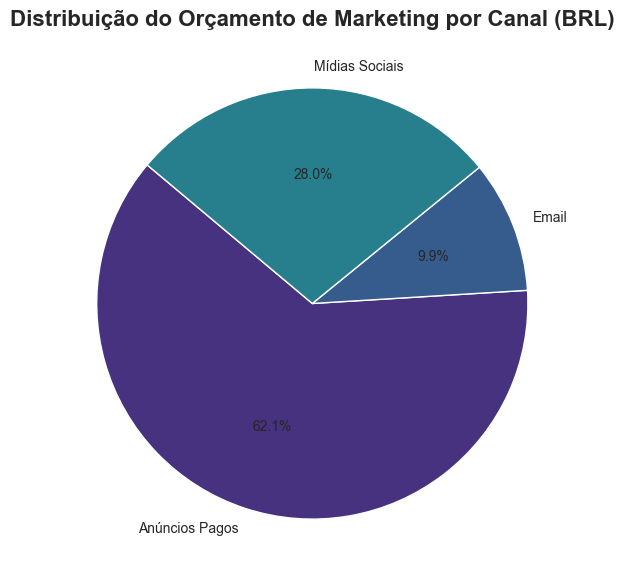

In [4]:
# --- CÉLULA 4: VISUALIZAÇÃO DA DISTRIBUIÇÃO DO ORÇAMENTO ---
#
# Objetivo: Criar um gráfico de pizza para fornecer uma visão clara e imediata
# de como o orçamento total de marketing é distribuído percentualmente entre os canais.
# Isso nos ajuda a entender a estratégia de investimento atual da empresa.

# 1. PREPARAÇÃO DOS DADOS PARA O GRÁFICO
# Para criar um gráfico de pizza dos totais, primeiro agregamos os dados.
# Agrupamos por 'Channel' e somamos o 'Budget_BRL' para obter o investimento total por canal.
budget_by_channel_brl = df.groupby('Channel')['Budget_BRL'].sum()


# 2. CRIAÇÃO E CUSTOMIZAÇÃO DO GRÁFICO DE PIZZA
# Define o tamanho da figura (a "tela") para garantir uma boa legibilidade.
plt.figure(figsize=(10, 7))

# A função plt.pie() é usada para desenhar o gráfico. Os parâmetros customizam o visual:
# - O primeiro argumento são os dados que definem o tamanho de cada fatia.
# - 'labels': Utiliza os nomes dos canais como rótulos para cada fatia.
# - 'autopct': Formata e exibe o valor percentual diretamente sobre cada fatia.
# - 'startangle' e 'colors': Ajustes estéticos para rotação e paleta de cores.
plt.pie(
    budget_by_channel_brl,
    labels=budget_by_channel_brl.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis')
)


# 3. FINALIZAÇÃO E EXIBIÇÃO
# Adiciona um título claro e descritivo ao gráfico.
plt.title('Distribuição do Orçamento de Marketing por Canal (BRL)', fontsize=16, fontweight='bold')

# Remove o rótulo do eixo Y, que é gerado por padrão pelo Matplotlib, para um visual mais limpo.
plt.ylabel('')

# O comando plt.show() renderiza e exibe o gráfico finalizado, evitando a impressão
# de outros textos de output da célula, o que é uma boa prática.
plt.show()




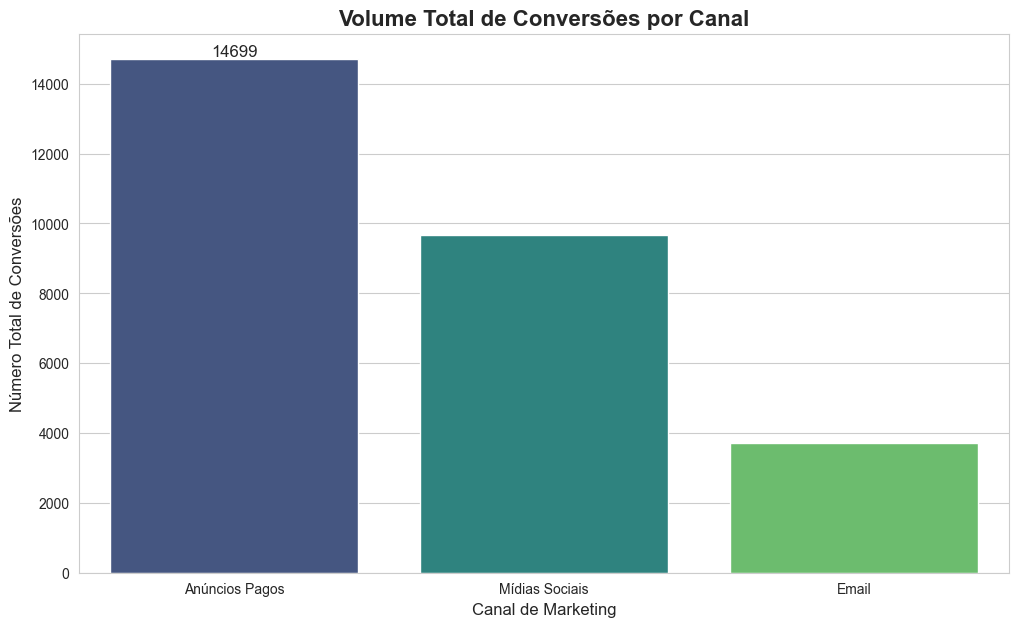

In [5]:
# --- CÉLULA 5: ANÁLISE DO VOLUME DE CONVERSÕES POR CANAL ---
#
# Objetivo: Quantificar e comparar o total de conversões geradas por cada canal.
# Após analisar o investimento, esta visualização responde à pergunta: "Qual canal
# trouxe o maior volume de resultados?". Um gráfico de barras é ideal para esta comparação.

# 1. PREPARAÇÃO DOS DADOS: RANKING DE PERFORMANCE
# Agregamos os dados por 'Channel' para somar o total de 'Conversions'.
# Em seguida, os resultados são ordenados em ordem decrescente (ascending=False).
# Esta ordenação é crucial para apresentar o gráfico como um ranking claro do
# canal de melhor para o de pior desempenho em volume.
conversions_by_channel = df.groupby('Channel')['Conversions'].sum().sort_values(ascending=False)


# 2. CRIAÇÃO E CUSTOMIZAÇÃO DO GRÁFICO DE BARRAS
# Define o tamanho da figura para uma boa legibilidade.
plt.figure(figsize=(12, 7))

# Utiliza a função 'barplot' do Seaborn, com os parâmetros ajustados para
# seguir as melhores práticas das novas versões da biblioteca.
# - hue: Define a variável que controla a cor de cada barra. Atribuir a mesma
#   variável do eixo x é a forma recomendada para evitar o FutureWarning.
# - legend: Remove a legenda redundante que o parâmetro 'hue' cria.
ax = sns.barplot(
    x=conversions_by_channel.index,
    y=conversions_by_channel.values,
    palette='viridis',
    hue=conversions_by_channel.index,
    legend=False
)


# 3. FINALIZAÇÃO E EXIBIÇÃO: ADICIONANDO CLAREZA
# Adiciona um título e rótulos aos eixos para que o gráfico seja autoexplicativo.
plt.title('Volume Total de Conversões por Canal', fontsize=16, fontweight='bold')
plt.xlabel('Canal de Marketing', fontsize=12)
plt.ylabel('Número Total de Conversões', fontsize=12)

# Este comando é um refinamento profissional: posiciona o valor numérico exato sobre
# cada barra, o que aumenta a precisão e facilita a interpretação dos resultados.
ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=12)

# O comando plt.show() renderiza o gráfico finalizado.
plt.show()




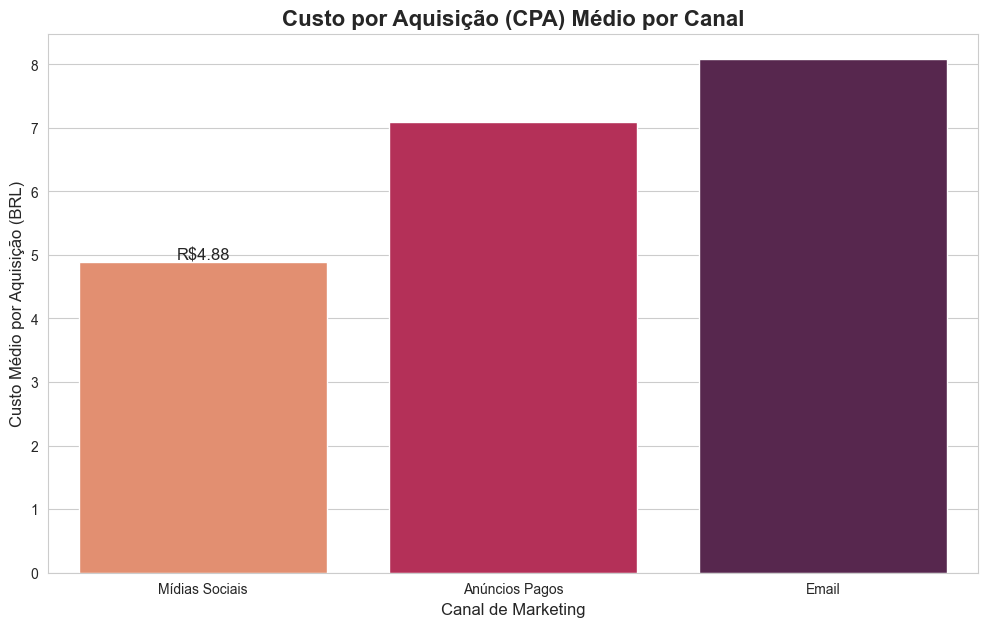

In [6]:
# --- CÉLULA 6: ANÁLISE DE EFICIÊNCIA POR CUSTO (CPA) ---
#
# Objetivo: Determinar o custo médio para adquirir um cliente em cada canal.
# Esta análise é o ponto central do projeto, pois conecta o investimento (custo)
# ao resultado (aquisição), avaliando a real eficiência financeira de cada canal.

# 1. PREPARAÇÃO DOS DADOS: RANKING DE EFICIÊNCIA
# Calculamos o CPA médio para cada canal e ordenamos os resultados em ordem
# crescente (ascending=True), pois um CPA menor representa um desempenho melhor.
cpa_por_canal = df.groupby('Channel')['CPA'].mean().sort_values(ascending=True)

# 2. CRIAÇÃO E CUSTOMIZAÇÃO DO GRÁFICO DE BARRAS
# Define o tamanho da figura.
plt.figure(figsize=(12, 7))

# Utiliza o barplot do Seaborn, com os parâmetros ajustados para as novas versões.
# - palette: A paleta 'rocket_r' é invertida para que o menor valor (melhor CPA)
#   receba a cor de maior destaque.
# - hue: Define qual categoria controla a cor. Atribuir a mesma variável do
#   eixo x é a prática recomendada para evitar o FutureWarning.
# - legend: Remove a legenda redundante que o parâmetro 'hue' cria.
ax = sns.barplot(
    x=cpa_por_canal.index,
    y=cpa_por_canal.values,
    palette='rocket_r',
    hue=cpa_por_canal.index,
    legend=False
)

# 3. FINALIZAÇÃO E EXIBIÇÃO: CONTEXTUALIZANDO OS CUSTOS
# Adiciona os elementos textuais para que o gráfico comunique a informação de forma clara.
plt.title('Custo por Aquisição (CPA) Médio por Canal', fontsize=16, fontweight='bold')
plt.xlabel('Canal de Marketing', fontsize=12)
plt.ylabel('Custo Médio por Aquisição (BRL)', fontsize=12)

# Formata o rótulo sobre cada barra como moeda (BRL), essencial para a interpretação de custo.
ax.bar_label(ax.containers[0], fmt='R$%.2f', fontsize=12)

# Renderiza o gráfico final.
plt.show()


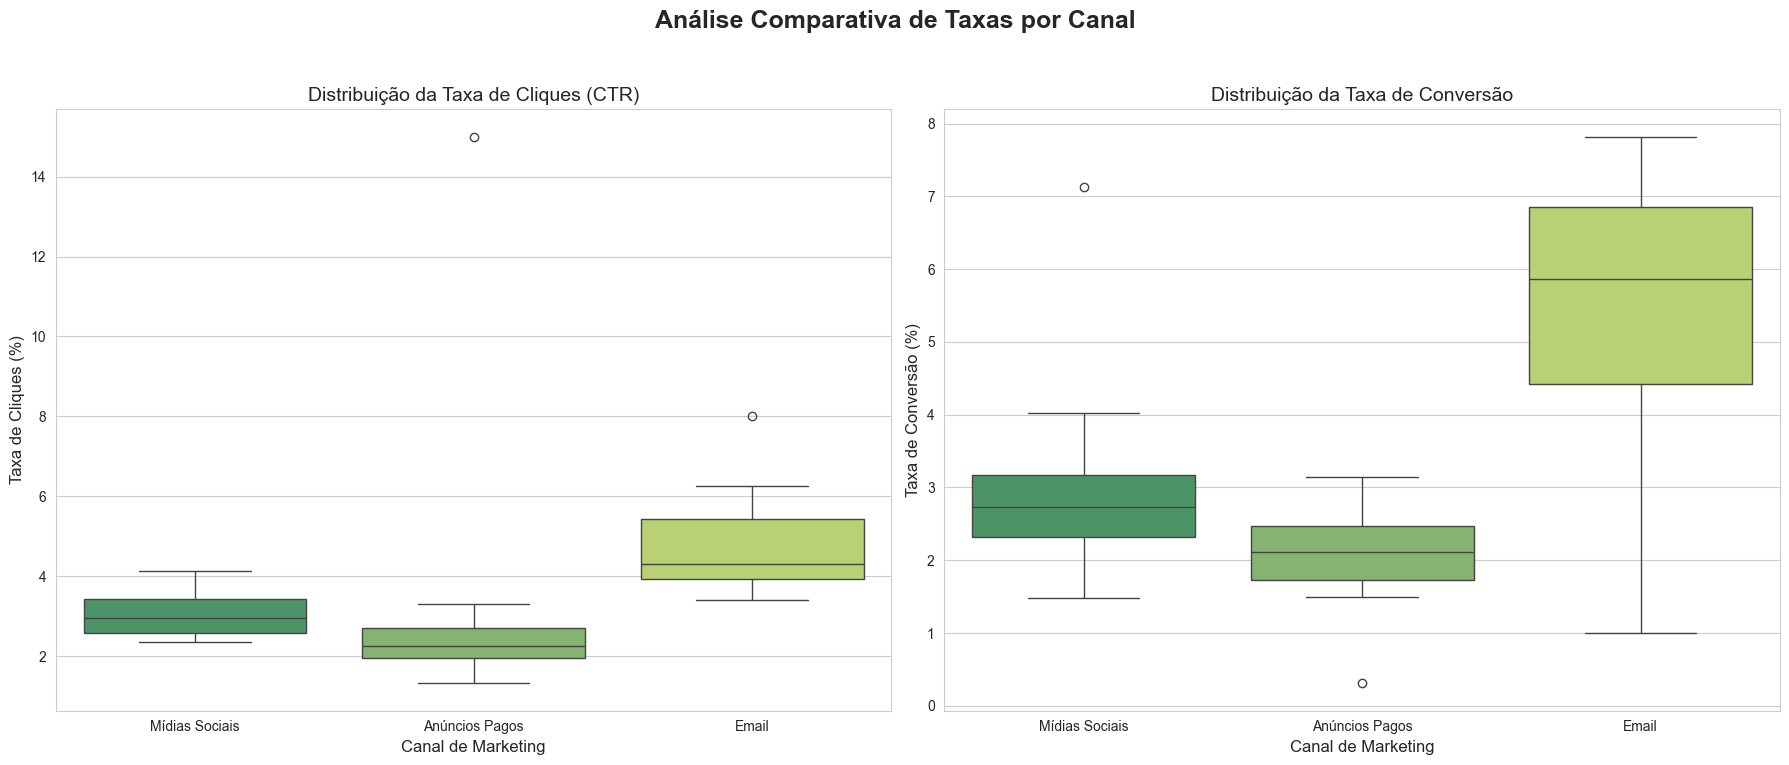

In [7]:
# --- CÉLULA 7: ANÁLISE DE DISTRIBUIÇÃO DAS TAXAS DE PERFORMANCE ---
#
# Objetivo: Aprofundar a análise para entender o 'porquê' por trás dos resultados de CPA,
# investigando o comportamento do usuário em duas etapas chave do funil de marketing.
#
# Metodologia de Visualização: Por que Boxplots?
# Enquanto um gráfico de barras nos mostra apenas um valor (como a média), um boxplot
# oferece uma visão muito mais rica da performance de cada canal. Ele nos permite ver:
#  - A Mediana (a linha central): O resultado mais típico de uma campanha.
#  - A Consistência (o tamanho da "caixa"): Caixas pequenas indicam performance
#    previsível; caixas grandes indicam grande variabilidade entre as campanhas.
#  - Outliers (os pontos isolados): Campanhas com desempenho excepcional (bom ou ruim).

# 1. INICIALIZAÇÃO DA FIGURA COM SUBPLOTS
# Criamos uma figura com dois gráficos (subplots) lado a lado. Isso permite
# uma comparação visual direta entre a distribuição do CTR e da Taxa de Conversão.
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Análise Comparativa de Taxas por Canal', fontsize=18, fontweight='bold')


# 2. GRÁFICO DE CTR (ATRAÇÃO)
# O primeiro subplot (axes[0]) visualiza a distribuição da Taxa de Cliques (CTR).
# Isso nos ajuda a entender qual canal é mais eficaz em gerar interesse inicial.
sns.boxplot(ax=axes[0], x='Channel', y='CTR (%)', data=df, hue='Channel', palette='summer', legend=False)
axes[0].set_title('Distribuição da Taxa de Cliques (CTR)', fontsize=14)
axes[0].set_xlabel('Canal de Marketing', fontsize=12)
axes[0].set_ylabel('Taxa de Cliques (%)', fontsize=12)


# 3. GRÁFICO DE TAXA DE CONVERSÃO (PERSUASÃO)
# O segundo subplot (axes[1]) visualiza a distribuição da Taxa de Conversão.
# Isso nos ajuda a entender qual canal é mais eficaz em converter esse interesse em vendas.
sns.boxplot(ax=axes[1], x='Channel', y='ConversionRate (%)', data=df, hue='Channel', palette='summer', legend=False)
axes[1].set_title('Distribuição da Taxa de Conversão', fontsize=14)
axes[1].set_xlabel('Canal de Marketing', fontsize=12)
axes[1].set_ylabel('Taxa de Conversão (%)', fontsize=12)


# 4. FINALIZAÇÃO E EXIBIÇÃO
# Ajusta o espaçamento entre os gráficos para evitar sobreposição de títulos e rótulos.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Renderiza a figura completa com os dois gráficos.
plt.show()

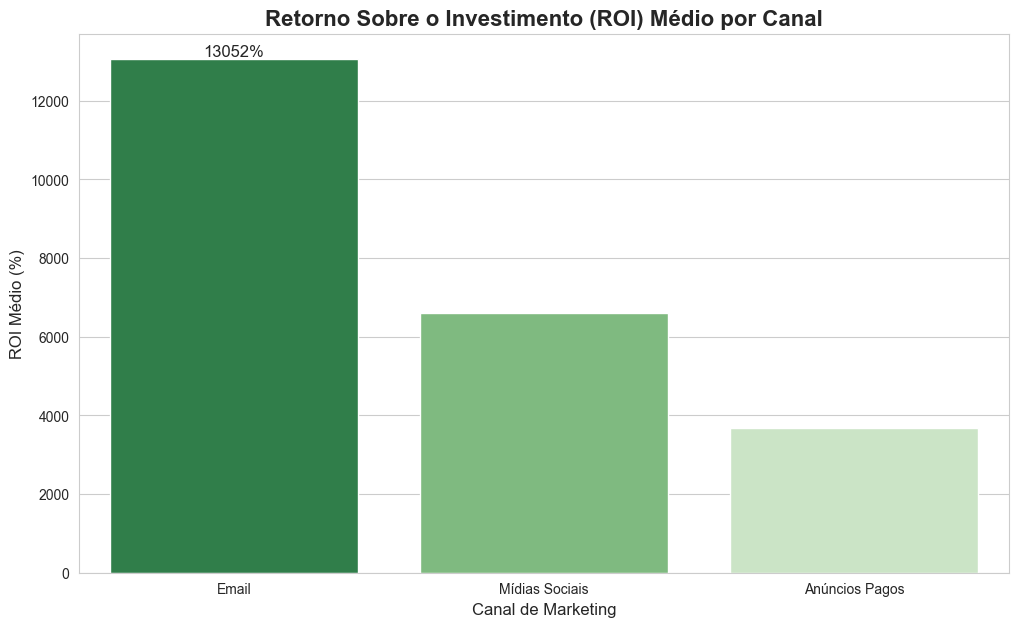

In [8]:
# --- CÉLULA 8: ANÁLISE DE LUCRATIVIDADE (ROI) ---
#
# Objetivo: Apresentar a métrica de negócio mais importante, o Retorno Sobre o
# Investimento (ROI). Este gráfico consolida todas as nossas análises anteriores
# (custo, conversões, receita) para responder à pergunta final: "Qual canal é o
# mais lucrativo e gera mais valor para a empresa?".

# 1. PREPARAÇÃO DOS DADOS: RANKING DE LUCRATIVIDADE
# Calculamos o ROI médio para cada canal e ordenamos os resultados em ordem
# decrescente. Isso posiciona o canal com maior retorno no topo do nosso ranking visual.
roi_por_canal = df.groupby('Channel')['ROI (%)'].mean().sort_values(ascending=False)


# 2. CRIAÇÃO E CUSTOMIZAÇÃO DO GRÁFICO DE BARRAS
# Define o tamanho da figura para uma apresentação clara.
plt.figure(figsize=(12, 7))

# Utiliza a função 'barplot' do Seaborn para criar o gráfico.
# Os parâmetros foram ajustados para seguir as melhores práticas das novas versões do Seaborn.
# - palette: 'Greens_r' associa o verde à lucratividade e o '_r' inverte a paleta,
#   garantindo que o maior ROI tenha o tom de verde mais forte.
# - hue: Define a variável que controla a cor de cada barra. Usar a mesma variável
#   do eixo x é a forma recomendada para evitar avisos (FutureWarning) da biblioteca.
# - legend: Como o eixo x já identifica os canais, a legenda criada pelo 'hue'
#   é removida para um visual mais limpo e sem redundância.
ax = sns.barplot(
    x=roi_por_canal.index,
    y=roi_por_canal.values,
    palette='Greens_r',
    hue=roi_por_canal.index,
    legend=False
)


# 3. FINALIZAÇÃO E EXIBIÇÃO: APRESENTANDO O RESULTADO FINAL
# Para customizar, usamos os métodos do objeto 'ax' (ex: ax.set_title). Esta é uma
# prática recomendada que permite um controle mais explícito sobre o gráfico.
ax.set_title('Retorno Sobre o Investimento (ROI) Médio por Canal', fontsize=16, fontweight='bold')
ax.set_xlabel('Canal de Marketing', fontsize=12)
ax.set_ylabel('ROI Médio (%)', fontsize=12)

# Adiciona o rótulo percentual exato sobre cada barra para clareza máxima.
ax.bar_label(ax.containers[0], fmt='%.0f%%', fontsize=12)

# Exibe o gráfico finalizado.
plt.show()

# Análise Conclusiva e Recomendações Estratégicas

## Resumo do Objetivo
O objetivo deste projeto foi realizar uma análise de performance dos três principais canais de marketing da empresa — **Email**, **Mídias Sociais** e **Anúncios Pagos** — a fim de identificar os mais eficazes e fornecer recomendações baseadas em dados para a otimização do orçamento.

---

## Principais Achados (Key Findings)

A análise de dados, do investimento à lucratividade, revelou um cenário claro e com várias nuances:

1.  **Estratégia de Volume:** O canal de **Anúncios Pagos** continua sendo o principal foco de investimento, com **62,1%** do orçamento, e é o responsável pelo maior **volume** bruto de conversões, com **14.699** aquisições.

2.  **A Nova Paisagem da Eficiência:** A análise de Custo por Aquisição (CPA) revelou uma surpresa: **Mídias Sociais** emergiu como o canal com o melhor custo-benefício, apresentando o menor CPA de **R$4,88**. Em contrapartida, o canal de **Email**, apesar de outras qualidades, mostrou o maior custo por aquisição.

3.  **O Paradoxo do ROI:** Apesar de possuir o maior CPA, a análise da lucratividade mostrou que o **Email** ainda entrega um **Retorno Sobre o Investimento (ROI) médio extraordinário de 13.052%**, superando todos os outros canais.

4.  **O Diagnóstico Final:** O altíssimo ROI do Email, mesmo com um CPA elevado, é explicado por sua **Taxa de Conversão fenomenalmente alta**. O canal é tão eficaz em converter cliques em vendas que a receita gerada supera em muito o seu custo. Enquanto isso, Mídias Sociais se destaca como uma opção equilibrada de baixo custo, e Anúncios Pagos como uma ferramenta de geração de volume em massa.

---

## Recomendações Estratégicas

Com base nesta nova e mais complexa visão, as seguintes ações são recomendadas:

### 1. Ação Imediata: Otimização de Orçamento com Foco Duplo
* **Escalar o Campeão de Custo-Benefício:** Aumentar experimentalmente o investimento em **Mídias Sociais** para validar se o baixo CPA de R$4,88 pode ser mantido em maior escala, gerando um grande volume de aquisições a um custo controlado.
* **Proteger e Entender a "Joia da Coroa":** Manter o investimento atual em **Email Marketing**, enquanto se investiga as causas do seu CPA elevado. O objetivo é reduzir os custos sem comprometer seu ROI massivo.

### 2. Ação de Médio Prazo: Otimização de Canais
* **Para Anúncios Pagos:** A prioridade continua sendo otimizar a **atratividade dos anúncios** para aumentar a baixa Taxa de Cliques (CTR), o que ajudará a reduzir seu CPA.
* **Para Email:** O foco deve ser em **otimizar os custos**. Analisar os segmentos e campanhas específicas dentro do canal para entender o que eleva o CPA e como reduzi-lo, potencializando ainda mais a lucratividade.

### 3. Visão Estratégica: Portfólio de Marketing Equilibrado
* Adotar uma visão de portfólio, onde cada canal tem um papel estratégico claro:
    * **Anúncios Pagos:** Motor principal para **volume** e alcance de mercado.
    * **Mídias Sociais:** Ferramenta mais eficiente para **aquisição de clientes com bom custo-benefício**.
    * **Email Marketing:** Pilar central para **máxima lucratividade e ROI**, focado em converter leads de alto valor.